make new emissions for testing AeroGP:

(0.1x, 0.5x, 1x(original emissions), and 2x) RAMIP EA and 10xBC EU

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import cartopy.crs as ccrs


In [10]:
#load original emissions

inputs_ramipEA_org = xr.open_dataset('../training_data_v2/inputs_ramip_ea.nc')
inputs_EU10BC_org = xr.open_dataset('../training_data_v2/inputs_10xEU_BC.nc')
inputs_histaer_org = xr.open_dataset('../training_data_v2/inputs_hist-aer.nc')

In [11]:
#make new copies
inputs_EA01 = inputs_ramipEA_org.copy(data={'SO2': inputs_ramipEA_org['SO2']*0.1, 'BC': inputs_ramipEA_org['BC']*0.1, 'OC': inputs_ramipEA_org['OC']*0.1})
inputs_EA05 = inputs_ramipEA_org.copy(data={'SO2': inputs_ramipEA_org['SO2']*0.5, 'BC': inputs_ramipEA_org['BC']*0.5, 'OC': inputs_ramipEA_org['OC']*0.5})
inputs_EA2 = inputs_ramipEA_org.copy(data={'SO2': inputs_ramipEA_org['SO2']*2, 'BC': inputs_ramipEA_org['BC']*2, 'OC': inputs_ramipEA_org['OC']*2})

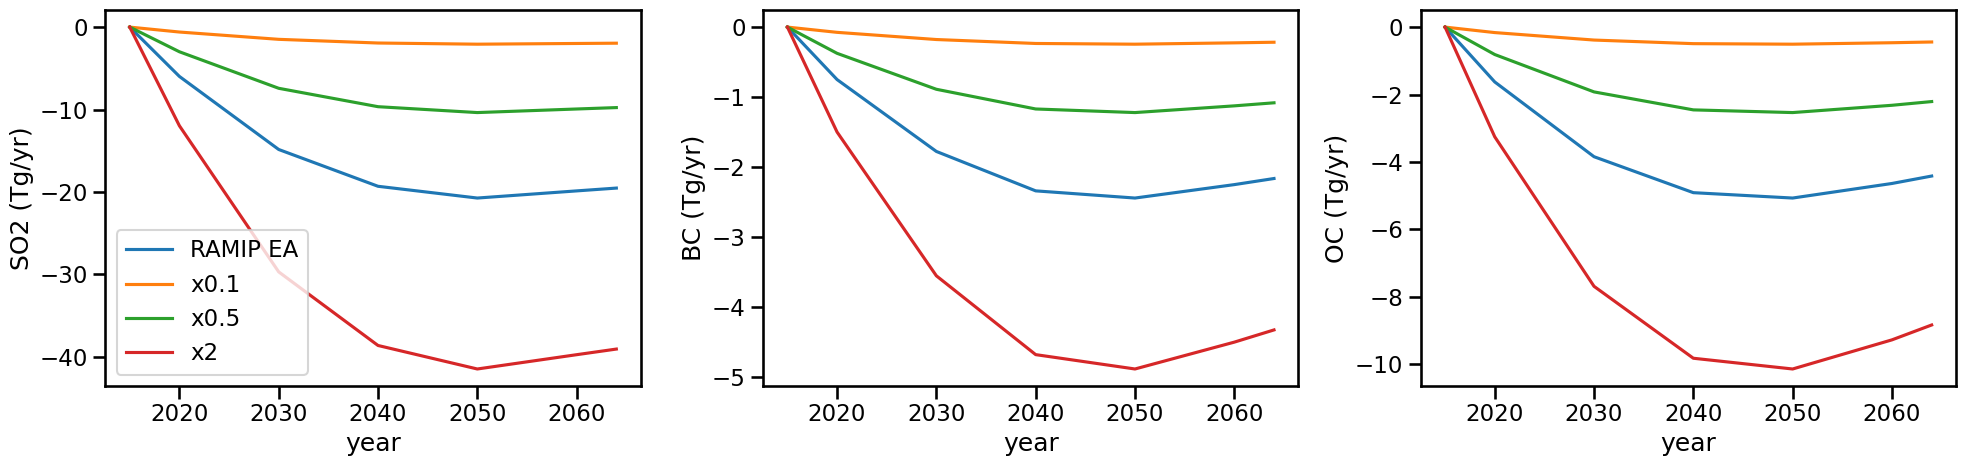

In [6]:
#3 column plot for SO2, BC, OC
with sns.plotting_context('talk'):
    plt.figure(figsize=(20,5))
    plt.subplot(131)
    inputs_ramipEA_org['SO2'].sum(('lat','lon')).plot(label='RAMIP EA')
    inputs_EA01['SO2'].sum(('lat','lon')).plot(label='x0.1')
    inputs_EA05['SO2'].sum(('lat','lon')).plot(label='x0.5')
    inputs_EA2['SO2'].sum(('lat','lon')).plot(label='x2')
    plt.legend()
    plt.ylabel('SO2 (Tg/yr)')

    plt.subplot(132)
    inputs_ramipEA_org['BC'].sum(('lat','lon')).plot(label='RAMIP EA')
    inputs_EA01['BC'].sum(('lat','lon')).plot(label='x0.1')
    inputs_EA05['BC'].sum(('lat','lon')).plot(label='x0.5')
    inputs_EA2['BC'].sum(('lat','lon')).plot(label='x2')
    plt.ylabel('BC (Tg/yr)')

    plt.subplot(133)
    inputs_ramipEA_org['OC'].sum(('lat','lon')).plot(label='RAMIP EA')
    inputs_EA01['OC'].sum(('lat','lon')).plot(label='x0.1')
    inputs_EA05['OC'].sum(('lat','lon')).plot(label='x0.5')
    inputs_EA2['OC'].sum(('lat','lon')).plot(label='x2')
    plt.ylabel('OC (Tg/yr)')

    plt.tight_layout()

In [14]:
#version which is only RAMIP EA SO2 changed:

inputs_EA01_so2only = inputs_ramipEA_org.copy(data={'SO2': inputs_ramipEA_org['SO2']*0.1, 'BC': inputs_ramipEA_org['BC']*0, 'OC': inputs_ramipEA_org['OC']*0})
inputs_EA05_so2only = inputs_ramipEA_org.copy(data={'SO2': inputs_ramipEA_org['SO2']*0.5, 'BC': inputs_ramipEA_org['BC']*0, 'OC': inputs_ramipEA_org['OC']*0})
inputs_EA2_so2only = inputs_ramipEA_org.copy(data={'SO2': inputs_ramipEA_org['SO2']*2, 'BC': inputs_ramipEA_org['BC']*0, 'OC': inputs_ramipEA_org['OC']*0})
inputs_EA_so2only = inputs_ramipEA_org.copy(data={'SO2': inputs_ramipEA_org['SO2'], 'BC': inputs_ramipEA_org['BC']*0, 'OC': inputs_ramipEA_org['OC']*0})

In [15]:
#save

inputs_EA01_so2only.to_netcdf('../testing_data/inputs_ramip_ea01_so2only.nc')
inputs_EA05_so2only.to_netcdf('../testing_data/inputs_ramip_ea05_so2only.nc')
inputs_EA2_so2only.to_netcdf('../testing_data/inputs_ramip_ea2_so2only.nc')
inputs_EA_so2only.to_netcdf('../testing_data/inputs_ramip_ea_so2only.nc')

In [16]:
#version which is only RAMIP EA BC changed:
inputs_EA01_bconly = inputs_ramipEA_org.copy(data={'SO2': inputs_ramipEA_org['SO2']*0, 'BC': inputs_ramipEA_org['BC']*0.1, 'OC': inputs_ramipEA_org['OC']*0})
inputs_EA05_bconly = inputs_ramipEA_org.copy(data={'SO2': inputs_ramipEA_org['SO2']*0, 'BC': inputs_ramipEA_org['BC']*0.5, 'OC': inputs_ramipEA_org['OC']*0})
inputs_EA2_bconly = inputs_ramipEA_org.copy(data={'SO2': inputs_ramipEA_org['SO2']*0, 'BC': inputs_ramipEA_org['BC']*2, 'OC': inputs_ramipEA_org['OC']*0})
inputs_EA_bconly = inputs_ramipEA_org.copy(data={'SO2': inputs_ramipEA_org['SO2']*0, 'BC': inputs_ramipEA_org['BC'], 'OC': inputs_ramipEA_org['OC']*0})

#version which is only RAMIP EA OC changed:
inputs_EA01_oconly = inputs_ramipEA_org.copy(data={'SO2': inputs_ramipEA_org['SO2']*0, 'BC': inputs_ramipEA_org['BC']*0, 'OC': inputs_ramipEA_org['OC']*0.1})
inputs_EA05_oconly = inputs_ramipEA_org.copy(data={'SO2': inputs_ramipEA_org['SO2']*0, 'BC': inputs_ramipEA_org['BC']*0, 'OC': inputs_ramipEA_org['OC']*0.5})
inputs_EA2_oconly = inputs_ramipEA_org.copy(data={'SO2': inputs_ramipEA_org['SO2']*0, 'BC': inputs_ramipEA_org['BC']*0, 'OC': inputs_ramipEA_org['OC']*2})
inputs_EA_oconly = inputs_ramipEA_org.copy(data={'SO2': inputs_ramipEA_org['SO2']*0, 'BC': inputs_ramipEA_org['BC']*0, 'OC': inputs_ramipEA_org['OC']})

In [17]:
#save
inputs_EA01_bconly.to_netcdf('../testing_data/inputs_ramip_ea01_bconly.nc')
inputs_EA05_bconly.to_netcdf('../testing_data/inputs_ramip_ea05_bconly.nc')
inputs_EA2_bconly.to_netcdf('../testing_data/inputs_ramip_ea2_bconly.nc')
inputs_EA_bconly.to_netcdf('../testing_data/inputs_ramip_ea_bconly.nc')

inputs_EA01_oconly.to_netcdf('../testing_data/inputs_ramip_ea01_oconly.nc')
inputs_EA05_oconly.to_netcdf('../testing_data/inputs_ramip_ea05_oconly.nc')
inputs_EA2_oconly.to_netcdf('../testing_data/inputs_ramip_ea2_oconly.nc')
inputs_EA_oconly.to_netcdf('../testing_data/inputs_ramip_ea_oconly.nc')

In [7]:
#new emissions for EU10BC
inputs_EU01 = inputs_EU10BC_org.copy(data={'SO2': inputs_EU10BC_org['SO2']*0.1, 'BC': inputs_EU10BC_org['BC']*0.1, 'OC': inputs_EU10BC_org['OC']*0.1})
inputs_EU05 = inputs_EU10BC_org.copy(data={'SO2': inputs_EU10BC_org['SO2']*0.5, 'BC': inputs_EU10BC_org['BC']*0.5, 'OC': inputs_EU10BC_org['OC']*0.5})
inputs_EU2 = inputs_EU10BC_org.copy(data={'SO2': inputs_EU10BC_org['SO2']*2, 'BC': inputs_EU10BC_org['BC']*2, 'OC': inputs_EU10BC_org['OC']*2})

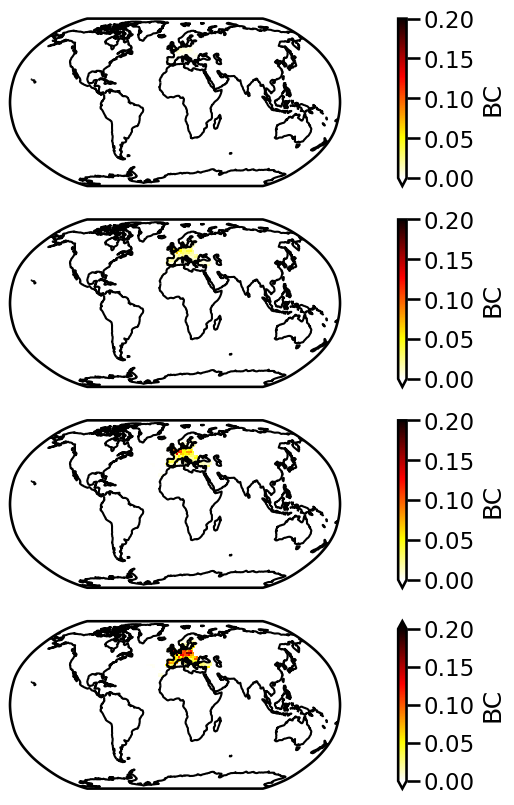

In [24]:
#plot new emissions for EU10BC
with sns.plotting_context('talk'):
    fig, axs = plt.subplots(4,1, figsize=(15, 10), subplot_kw={'projection': ccrs.Robinson()})
    cmap = plt.get_cmap('hot_r')
    norm = colors.Normalize(vmin=0, vmax=0.2)
    inputs_EU01['BC'].plot(ax=axs[0], transform=ccrs.PlateCarree(),cmap=cmap, norm=norm)
    axs[0].coastlines()

    inputs_EU05['BC'].plot(ax=axs[1], transform=ccrs.PlateCarree(),cmap=cmap, norm=norm)
    axs[1].coastlines()

    inputs_EU10BC_org['BC'].plot(ax=axs[2], transform=ccrs.PlateCarree(),cmap=cmap, norm=norm)
    axs[2].coastlines()

    inputs_EU2['BC'].plot(ax=axs[3], transform=ccrs.PlateCarree(),cmap=cmap, norm=norm)
    axs[3].coastlines()

    

In [22]:
inputs_histaer_org = xr.open_dataset('../training_data_v2/inputs_hist-aer.nc')

inputs_histaer01 = inputs_histaer_org.copy(data={'SO2': inputs_histaer_org['SO2']*0.1, 'BC': inputs_histaer_org['BC']*0.1, 'OC': inputs_histaer_org['OC']*0.1})
inputs_histaer05 = inputs_histaer_org.copy(data={'SO2': inputs_histaer_org['SO2']*0.5, 'BC': inputs_histaer_org['BC']*0.5, 'OC': inputs_histaer_org['OC']*0.5})
inputs_histaer2 = inputs_histaer_org.copy(data={'SO2': inputs_histaer_org['SO2']*2, 'BC': inputs_histaer_org['BC']*2, 'OC': inputs_histaer_org['OC']*2})


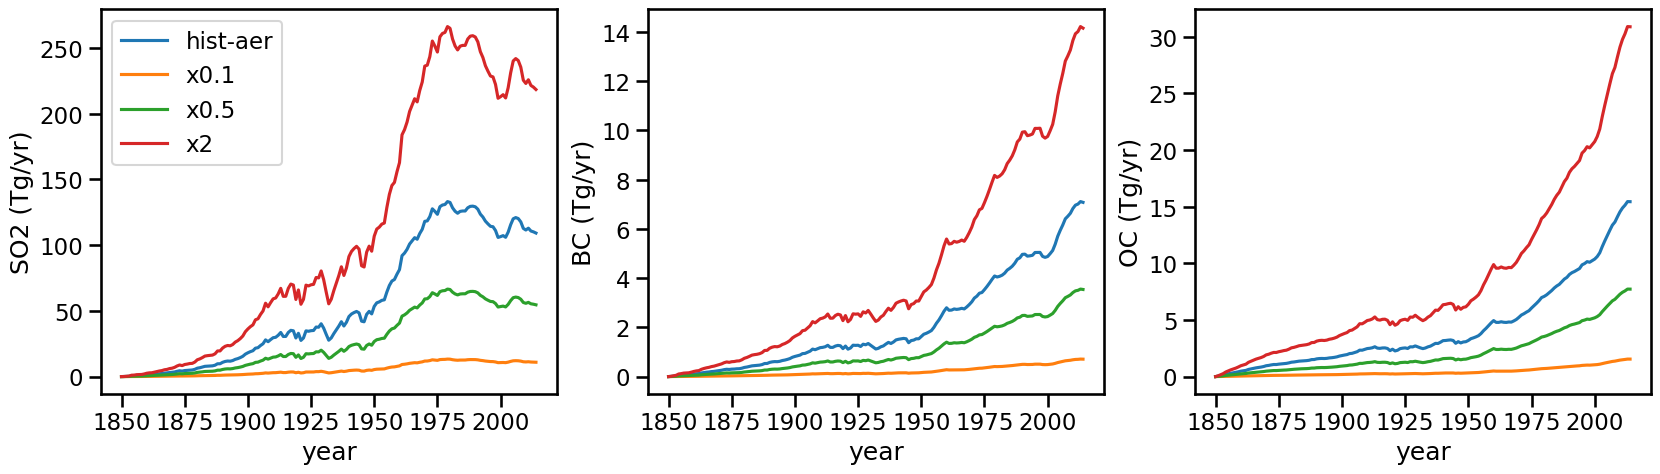

In [23]:
with sns.plotting_context('talk'):
    plt.figure(figsize=(20,5))
    plt.subplot(131)
    inputs_histaer_org['SO2'].sum(('lat','lon')).plot(label='hist-aer')
    inputs_histaer01['SO2'].sum(('lat','lon')).plot(label='x0.1')
    inputs_histaer05['SO2'].sum(('lat','lon')).plot(label='x0.5')
    inputs_histaer2['SO2'].sum(('lat','lon')).plot(label='x2')
    plt.legend()
    plt.ylabel('SO2 (Tg/yr)')  

    plt.subplot(132)
    inputs_histaer_org['BC'].sum(('lat','lon')).plot(label='hist-aer')
    inputs_histaer01['BC'].sum(('lat','lon')).plot(label='x0.1')
    inputs_histaer05['BC'].sum(('lat','lon')).plot(label='x0.5')
    inputs_histaer2['BC'].sum(('lat','lon')).plot(label='x2')
    plt.ylabel('BC (Tg/yr)')

    plt.subplot(133)
    inputs_histaer_org['OC'].sum(('lat','lon')).plot(label='hist-aer')
    inputs_histaer01['OC'].sum(('lat','lon')).plot(label='x0.1')
    inputs_histaer05['OC'].sum(('lat','lon')).plot(label='x0.5')
    inputs_histaer2['OC'].sum(('lat','lon')).plot(label='x2')
    plt.ylabel('OC (Tg/yr)')

In [ ]:
#save new emissions
inputs_EA01.to_netcdf('../inputs_ramipEA01.nc')
inputs_EA05.to_netcdf('../inputs_ramipEA05.nc')
inputs_EA2.to_netcdf('../inputs_ramipEA2.nc')

inputs_EU01.to_netcdf('../inputs_EUBC01.nc')
inputs_EU05.to_netcdf('../inputs_EUBC05.nc')
inputs_EU2.to_netcdf('../inputs_EUBC2.nc')

inputs_histaer01.to_netcdf('../inputs_histaer01.nc')
inputs_histaer05.to_netcdf('../inputs_histaer05.nc')
inputs_histaer2.to_netcdf('../inputs_histaer2.nc')

In [ ]:
#load original emissions:

input5EAso2 = xr.open_dataset('../training_data_v2/inputs_5xEA_SO2.nc')
inputssp245 = xr.open_dataset('../training_data_v2/inputs_ssp245-aer.nc')


In [4]:
#scale emissions:

inputs5EAso2_01 = input5EAso2.copy(data={'SO2': input5EAso2['SO2']*0.1, 'BC': input5EAso2['BC']*0.1, 'OC': input5EAso2['OC']*0.1})
inputs5EAso2_05 = input5EAso2.copy(data={'SO2': input5EAso2['SO2']*0.5, 'BC': input5EAso2['BC']*0.5, 'OC': input5EAso2['OC']*0.5})
inputs5EAso2_2 = input5EAso2.copy(data={'SO2': input5EAso2['SO2']*2, 'BC': input5EAso2['BC']*2, 'OC': input5EAso2['OC']*2})

inputssp245_01 = inputssp245.copy(data={'SO2': inputssp245['SO2']*0.1, 'BC': inputssp245['BC']*0.1, 'OC': inputssp245['OC']*0.1})
inputssp245_05 = inputssp245.copy(data={'SO2': inputssp245['SO2']*0.5, 'BC': inputssp245['BC']*0.5, 'OC': inputssp245['OC']*0.5})
inputssp245_2 = inputssp245.copy(data={'SO2': inputssp245['SO2']*2, 'BC': inputssp245['BC']*2, 'OC': inputssp245['OC']*2})


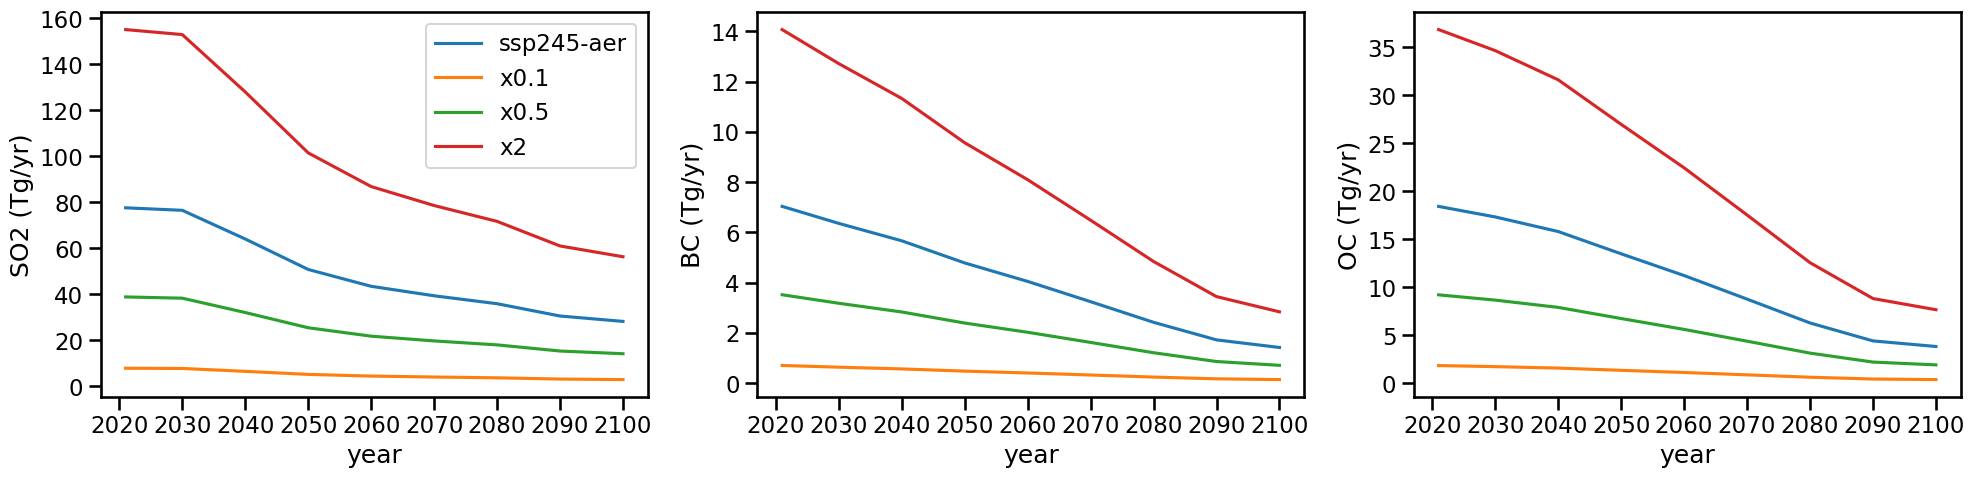

In [6]:
#plot to check:
with sns.plotting_context('talk'):
    plt.figure(figsize=(24,5))
    plt.subplot(131)
    inputssp245['SO2'].sum(('lat','lon')).plot(label='ssp245-aer')
    inputssp245_01['SO2'].sum(('lat','lon')).plot(label='x0.1')
    inputssp245_05['SO2'].sum(('lat','lon')).plot(label='x0.5')
    inputssp245_2['SO2'].sum(('lat','lon')).plot(label='x2')
    plt.legend()
    plt.ylabel('SO2 (Tg/yr)')  

    plt.subplot(132)
    inputssp245['BC'].sum(('lat','lon')).plot(label='ssp245-aer')
    inputssp245_01['BC'].sum(('lat','lon')).plot(label='x0.1')
    inputssp245_05['BC'].sum(('lat','lon')).plot(label='x0.5')
    inputssp245_2['BC'].sum(('lat','lon')).plot(label='x2')
    plt.ylabel('BC (Tg/yr)')

    plt.subplot(133)
    inputssp245['OC'].sum(('lat','lon')).plot(label='ssp245-aer')
    inputssp245_01['OC'].sum(('lat','lon')).plot(label='x0.1')
    inputssp245_05['OC'].sum(('lat','lon')).plot(label='x0.5')
    inputssp245_2['OC'].sum(('lat','lon')).plot(label='x2')
    plt.ylabel('OC (Tg/yr)')

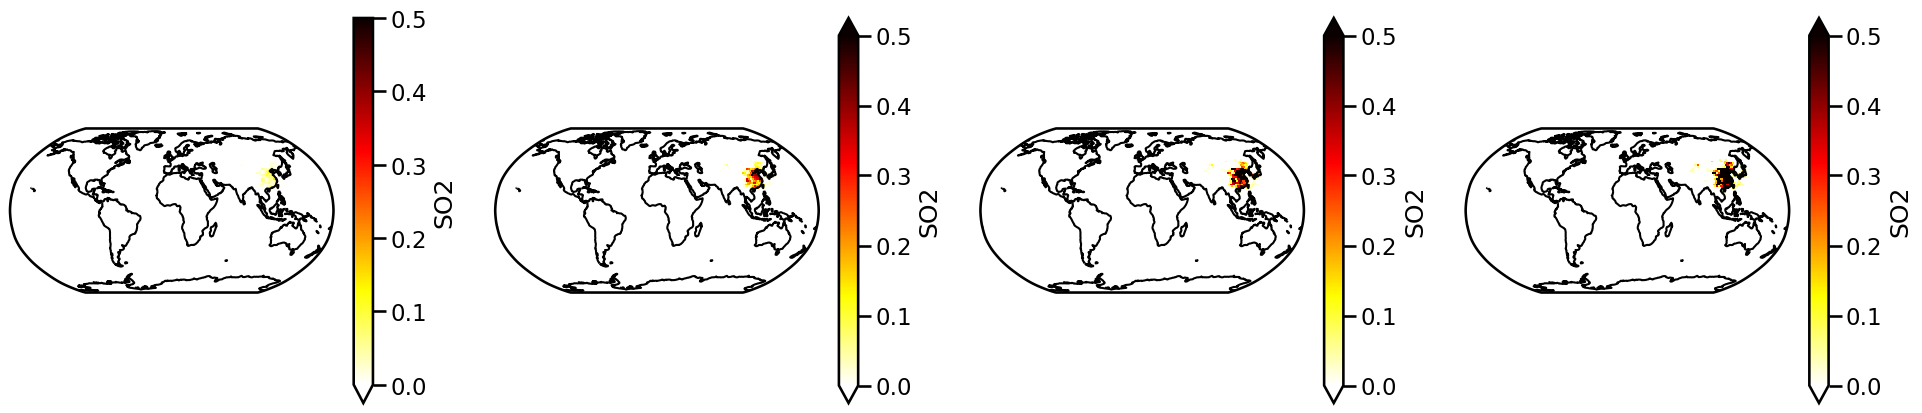

In [8]:
with sns.plotting_context('talk'):
    fig, axs = plt.subplots(1,4, figsize=(24, 5), subplot_kw={'projection': ccrs.Robinson()})
    cmap = plt.get_cmap('hot_r')
    norm = colors.Normalize(vmin=0, vmax=0.5)
    inputs5EAso2_01['SO2'].plot(ax=axs[0], transform=ccrs.PlateCarree(),cmap=cmap, norm=norm)
    axs[0].coastlines()

    inputs5EAso2_05['SO2'].plot(ax=axs[1], transform=ccrs.PlateCarree(),cmap=cmap, norm=norm)
    axs[1].coastlines()

    input5EAso2['SO2'].plot(ax=axs[2], transform=ccrs.PlateCarree(),cmap=cmap, norm=norm)
    axs[2].coastlines()

    inputs5EAso2_2['SO2'].plot(ax=axs[3], transform=ccrs.PlateCarree(),cmap=cmap, norm=norm)
    axs[3].coastlines()

In [9]:
#save new emissions
inputs5EAso2_01.to_netcdf('../testing_data/inputs_5xEA_SO2_01.nc')
inputs5EAso2_05.to_netcdf('../testing_data/inputs_5xEA_SO2_05.nc')
inputs5EAso2_2.to_netcdf('../testing_data/inputs_5xEA_SO2_2.nc')
inputssp245_01.to_netcdf('../testing_data/inputs_ssp245-aer_01.nc')
inputssp245_05.to_netcdf('../testing_data/inputs_ssp245-aer_05.nc')
inputssp245_2.to_netcdf('../testing_data/inputs_ssp245-aer_2.nc')


In [3]:
#load original emissions

inputs_0eaSO2 = xr.open_dataset('../training_data_v2/inputs_0xEA_SO2.nc')

In [4]:
#scale emissions

inputs_0eaSO2_01 = inputs_0eaSO2.copy(data={'SO2': inputs_0eaSO2['SO2']*0.1, 'BC': inputs_0eaSO2['BC']*0.1, 'OC': inputs_0eaSO2['OC']*0.1})
inputs_0eaSO2_05 = inputs_0eaSO2.copy(data={'SO2': inputs_0eaSO2['SO2']*0.5, 'BC': inputs_0eaSO2['BC']*0.5, 'OC': inputs_0eaSO2['OC']*0.5})
inputs_0eaSO2_2 = inputs_0eaSO2.copy(data={'SO2': inputs_0eaSO2['SO2']*2, 'BC': inputs_0eaSO2['BC']*2, 'OC': inputs_0eaSO2['OC']*2})

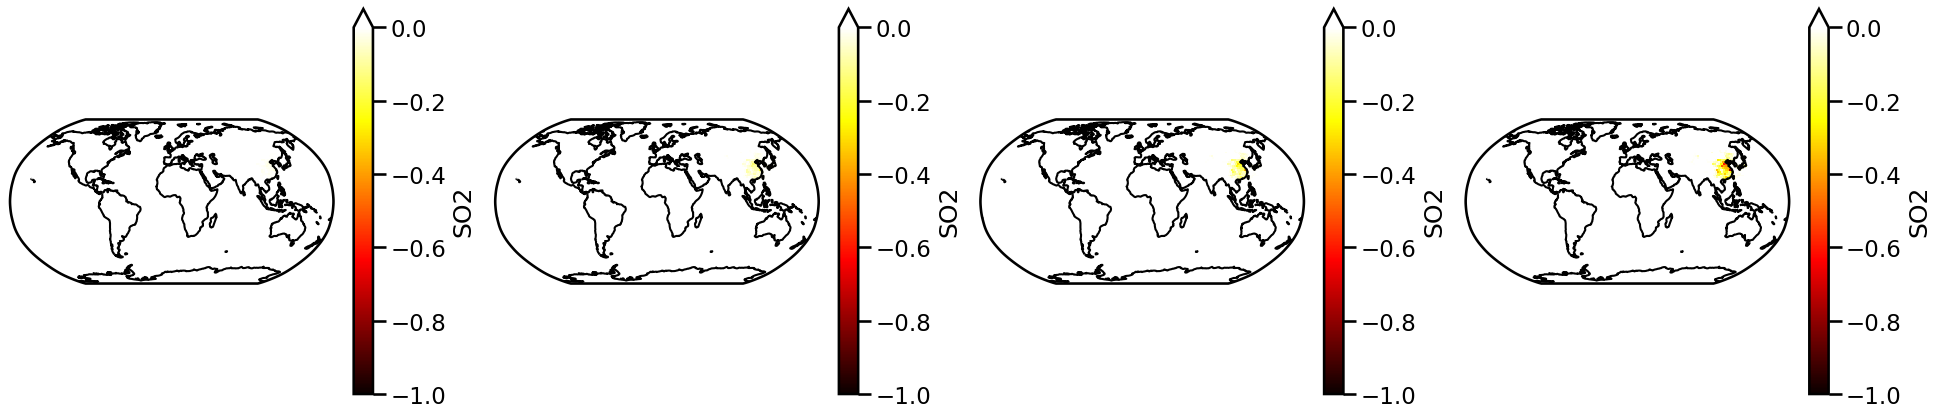

In [8]:
#plot
with sns.plotting_context('talk'):
    fig, axs = plt.subplots(1,4, figsize=(24, 5), subplot_kw={'projection': ccrs.Robinson()})
    cmap = plt.get_cmap('hot')
    norm = colors.Normalize(vmin=-1.0, vmax=0.0)
    inputs_0eaSO2_01['SO2'].plot(ax=axs[0], transform=ccrs.PlateCarree(),cmap=cmap, norm=norm)
    axs[0].coastlines()

    inputs_0eaSO2_05['SO2'].plot(ax=axs[1], transform=ccrs.PlateCarree(),cmap=cmap, norm=norm)
    axs[1].coastlines()

    inputs_0eaSO2['SO2'].plot(ax=axs[2], transform=ccrs.PlateCarree(),cmap=cmap, norm=norm)
    axs[2].coastlines()

    inputs_0eaSO2_2['SO2'].plot(ax=axs[3], transform=ccrs.PlateCarree(),cmap=cmap, norm=norm)
    axs[3].coastlines()

In [9]:
#save

inputs_0eaSO2_01.to_netcdf('../testing_data/inputs_0xEA_SO2_01.nc')
inputs_0eaSO2_05.to_netcdf('../testing_data/inputs_0xEA_SO2_05.nc')
inputs_0eaSO2_2.to_netcdf('../testing_data/inputs_0xEA_SO2_2.nc')

In [18]:
#load original emissions

inputs_10saSO2 = xr.open_dataset('../training_data_v2/inputs_10xSA_SO2.nc')
inputs_7euSO2 = xr.open_dataset('../training_data_v2/inputs_7xEU_SO2.nc')

In [19]:
#scale emissions

inputs_10saSO2_01 = inputs_10saSO2.copy(data={'SO2': inputs_10saSO2['SO2']*0.1, 'BC': inputs_10saSO2['BC']*0.1, 'OC': inputs_10saSO2['OC']*0.1})
inputs_10saSO2_05 = inputs_10saSO2.copy(data={'SO2': inputs_10saSO2['SO2']*0.5, 'BC': inputs_10saSO2['BC']*0.5, 'OC': inputs_10saSO2['OC']*0.5})
inputs_10saSO2_2 = inputs_10saSO2.copy(data={'SO2': inputs_10saSO2['SO2']*2, 'BC': inputs_10saSO2['BC']*2, 'OC': inputs_10saSO2['OC']*2})

inputs_7euSO2_01 = inputs_7euSO2.copy(data={'SO2': inputs_7euSO2['SO2']*0.1, 'BC': inputs_7euSO2['BC']*0.1, 'OC': inputs_7euSO2['OC']*0.1})
inputs_7euSO2_05 = inputs_7euSO2.copy(data={'SO2': inputs_7euSO2['SO2']*0.5, 'BC': inputs_7euSO2['BC']*0.5, 'OC': inputs_7euSO2['OC']*0.5})
inputs_7euSO2_2 = inputs_7euSO2.copy(data={'SO2': inputs_7euSO2['SO2']*2, 'BC': inputs_7euSO2['BC']*2, 'OC': inputs_7euSO2['OC']*2})

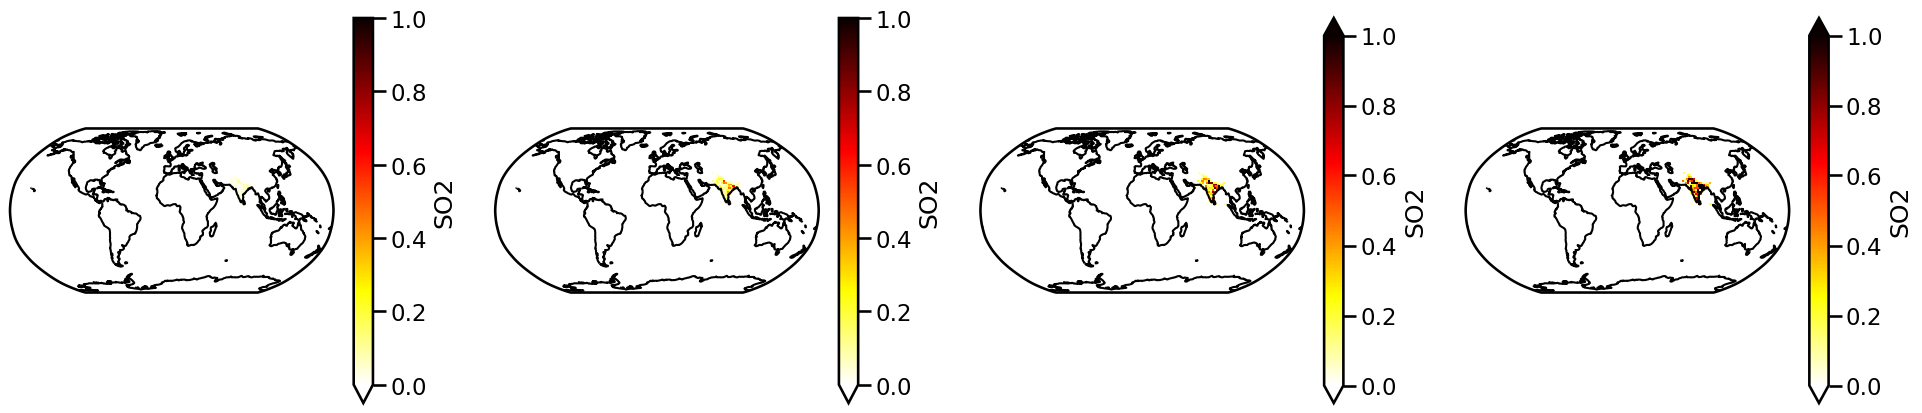

In [21]:
#plot
with sns.plotting_context('talk'):
    fig, axs = plt.subplots(1,4, figsize=(24, 5), subplot_kw={'projection': ccrs.Robinson()})
    cmap = plt.get_cmap('hot_r')
    norm = colors.Normalize(vmin=0.0, vmax=1.0)
    inputs_10saSO2_01['SO2'].plot(ax=axs[0], transform=ccrs.PlateCarree(),cmap=cmap, norm=norm)
    axs[0].coastlines()

    inputs_10saSO2_05['SO2'].plot(ax=axs[1], transform=ccrs.PlateCarree(),cmap=cmap, norm=norm)
    axs[1].coastlines()

    inputs_10saSO2['SO2'].plot(ax=axs[2], transform=ccrs.PlateCarree(),cmap=cmap, norm=norm)
    axs[2].coastlines()

    inputs_10saSO2_2['SO2'].plot(ax=axs[3], transform=ccrs.PlateCarree(),cmap=cmap, norm=norm)
    axs[3].coastlines()

In [22]:
#save

inputs_10saSO2_01.to_netcdf('../testing_data/inputs_10xSA_SO2_01.nc')
inputs_10saSO2_05.to_netcdf('../testing_data/inputs_10xSA_SO2_05.nc')
inputs_10saSO2_2.to_netcdf('../testing_data/inputs_10xSA_SO2_2.nc')

inputs_7euSO2_01.to_netcdf('../testing_data/inputs_7xEU_SO2_01.nc')
inputs_7euSO2_05.to_netcdf('../testing_data/inputs_7xEU_SO2_05.nc')
inputs_7euSO2_2.to_netcdf('../testing_data/inputs_7xEU_SO2_2.nc')

In [23]:
print('7xEU SO2 total: ', inputs_7euSO2['SO2'].sum(('lat','lon')).values)
print('10xSA SO2 total: ', inputs_10saSO2['SO2'].sum(('lat','lon')).values)

7xEU SO2 total:  43.31881671578651
10xSA SO2 total:  29.09591838015379


In [24]:
43/29

1.4827586206896552